# Data Exploring

#carID: Unique identifier
#brand: Car manufacturer
#model: Car model
#year: Production year
#transmission: Gear type
#mileage: Distance driven
#fuelType: Fuel used
#tax: Annual tax
#mpg: Fuel efficiency
#engineSize: Engine volume
#price: cost in dollar($)

In [25]:
import  matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [26]:
car = pd.read_csv('cars.csv') 
car.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


In [27]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4942 non-null   object 
 2   model         4960 non-null   object 
 3   year          4960 non-null   int64  
 4   transmission  4960 non-null   object 
 5   mileage       4954 non-null   float64
 6   fuelType      4943 non-null   object 
 7   tax           4960 non-null   int64  
 8   mpg           4948 non-null   float64
 9   engineSize    4952 non-null   float64
 10  price         4960 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 426.4+ KB


In [28]:
car.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4960.000000,4954.000000,4960.000000,4948.000000,4952.000000,4960.000000
mean,15832.446169,2016.737903,24949.957812,152.332661,50.390158,2.123425,23469.943750
std,2206.717006,2.884035,24451.380600,82.403844,35.781756,0.786778,16406.714563
min,12002.000000,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,13929.250000,2016.000000,5622.500000,145.000000,38.700000,1.600000,12000.000000
50%,15840.000000,2017.000000,18971.500000,145.000000,47.100000,2.000000,18999.000000
75%,17765.750000,2019.000000,36692.750000,150.000000,54.300000,2.800000,30335.750000
max,19629.000000,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


In [29]:
car.shape

(4960, 11)

In [30]:
if 'carID' in car.columns:
    car = car.drop(['carID'], axis = 1)


In [31]:
car.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


# Data Cleaning

In [33]:
car.isnull().sum()

brand           18
model            0
year             0
transmission     0
mileage          6
fuelType        17
tax              0
mpg             12
engineSize       8
price            0
dtype: int64

In [34]:
car['brand'].unique()

array(['hyundi', 'vauxhall', 'audi', 'vw', 'skoda', 'merc', 'toyota',
       'bmw', 'ford', nan], dtype=object)

In [35]:
car['brand'].mode()

0    merc
Name: brand, dtype: object

In [36]:
car['brand'] = car['brand'].fillna('merc')

In [38]:
car['mileage'].mean()

24949.957811869197

In [43]:
car['mileage'] = car['mileage'].fillna(24949.957811869197)

In [50]:
car['fuelType'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric', nan],
      dtype=object)

In [53]:
car['fuelType'].mode()

0    Diesel
Name: fuelType, dtype: object

In [56]:
car['fuelType'] = car['fuelType'].fillna('Diesel')

In [58]:
car['mpg'].mean()

50.39015763945028

In [60]:
car['mpg'] = car['mpg'].fillna(50.39015763945028)

In [62]:
car['engineSize'].mean()

2.123424878836834

In [64]:
car['engineSize'] = car['engineSize'].fillna(2.123424878836834)

In [66]:
car.isnull().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [68]:
sum(car.duplicated())

30

In [70]:
car.drop_duplicates(inplace = True)

# Data Outliers

In [74]:
q1 = car['year'].quantile(0.25)
q3 = car['year'].quantile(0.75)
iqr = q3-q1
upper = q3+1.5 * iqr
lower = q1-1.5 * iqr
test1 = car[(car['year'] <= lower) | (car['year'] >= upper)] 
test1.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
24,ford,Galaxy,2009,Manual,58000.0,Diesel,200,44.8,1.8,5475
41,vw,Caravelle,2006,Manual,106000.0,Diesel,325,34.4,2.5,14495
45,merc,S Class,2009,Automatic,122000.0,Diesel,325,36.7,3.0,7724
57,hyundi,IX35,2011,Manual,79000.0,Petrol,205,41.5,1.6,5475
65,merc,M Class,2008,Automatic,110000.0,Diesel,555,28.8,3.0,5990


In [76]:
q1 = car['mileage'].quantile(0.25)
q3 = car['mileage'].quantile(0.75)
iqr = q3-q1
upper = q3+1.5 * iqr
lower = q1-1.5 * iqr
test1 = car[(car['mileage'] <= lower) | (car['mileage'] >= upper)] 
test1.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
9,ford,KA,2012,Manual,85843.0,Petrol,30,57.7,1.2,3491
41,vw,Caravelle,2006,Manual,106000.0,Diesel,325,34.4,2.5,14495
45,merc,S Class,2009,Automatic,122000.0,Diesel,325,36.7,3.0,7724
65,merc,M Class,2008,Automatic,110000.0,Diesel,555,28.8,3.0,5990
99,vw,Scirocco,2011,Semi-Auto,120000.0,Diesel,125,57.6,2.0,5995


In [78]:
q1 = car['tax'].quantile(0.25)
q3 = car['tax'].quantile(0.75)
iqr = q3-q1
upper = q3+1.5 * iqr
lower = q1-1.5 * iqr
test1 = car[(car['tax'] <= lower) | (car['tax'] >= upper)] 
test1.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
1,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
3,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
6,toyota,Prius,2020,Automatic,3.0,Hybrid,135,64.2,1.8,25990
8,toyota,Camry,2019,Automatic,6340.0,Hybrid,135,52.3,2.5,25490
9,ford,KA,2012,Manual,85843.0,Petrol,30,57.7,1.2,3491


In [80]:
q1 = car['mpg'].quantile(0.25)
q3 = car['mpg'].quantile(0.75)
iqr = q3-q1
upper = q3+1.5 * iqr
lower = q1-1.5 * iqr
test1 = car[(car['mpg'] <= lower) | (car['mpg'] >= upper)] 
test1.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
34,toyota,Prius,2017,Automatic,24949.957812,Hybrid,135,94.1,1.8,18995
39,toyota,Prius,2017,Automatic,33710.000000,Hybrid,135,94.1,1.8,17800
50,bmw,i3,2017,Automatic,20929.000000,Hybrid,135,470.8,0.0,19948
62,toyota,Prius,2016,Automatic,23300.000000,Hybrid,0,85.6,1.8,18690
80,bmw,i8,2018,Automatic,11278.000000,Hybrid,135,134.5,1.5,57870


In [82]:
q1 = car['engineSize'].quantile(0.25)
q3 = car['engineSize'].quantile(0.75)
iqr = q3-q1
upper = q3+1.5 * iqr
lower = q1-1.5 * iqr
test1 = car[(car['engineSize'] <= lower) | (car['engineSize'] >= upper)] 
test1.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
54,ford,Mustang,2017,Manual,20700.0,Petrol,150,20.9,5.0,27500
84,ford,Mustang,2017,Semi-Auto,26452.0,Petrol,580,23.5,5.0,27890
92,ford,Mustang,2020,Automatic,3500.0,Petrol,145,22.1,5.0,42489
284,ford,Mustang,2019,Automatic,1055.0,Petrol,145,22.1,5.0,37991
310,merc,GLS Class,2018,Semi-Auto,41102.0,Petrol,145,23.0,5.5,64999


In [84]:
q1 = car['price'].quantile(0.25)
q3 = car['price'].quantile(0.75)
iqr = q3-q1
upper = q3+1.5 * iqr
lower = q1-1.5 * iqr
test1 = car[(car['price'] <= lower) | (car['price'] >= upper)] 
test1.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
2,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
114,vw,California,2019,Semi-Auto,3544.0,Diesel,260,29.1,2.0,69994
133,merc,G Class,2018,Semi-Auto,18234.0,Petrol,150,21.4,4.0,135124
150,bmw,X7,2019,Semi-Auto,10.0,Diesel,145,31.4,3.0,76970
202,merc,S Class,2019,Semi-Auto,4688.0,Petrol,150,31.7,4.0,109995


<Axes: ylabel='fuelType'>

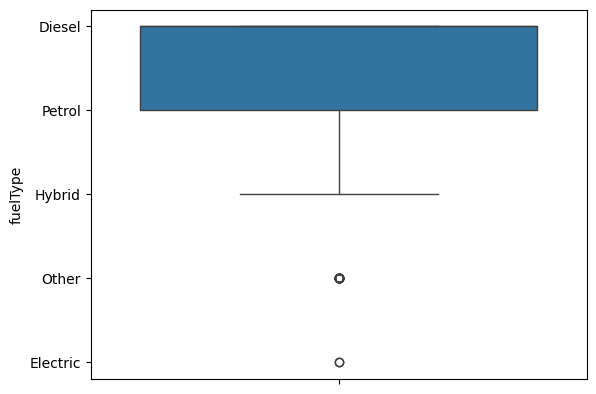

In [86]:
sns.boxplot(data = car['fuelType'])

# Data Visualization 

In [88]:
bra_pri = car.groupby('brand')['price'].mean().reset_index()

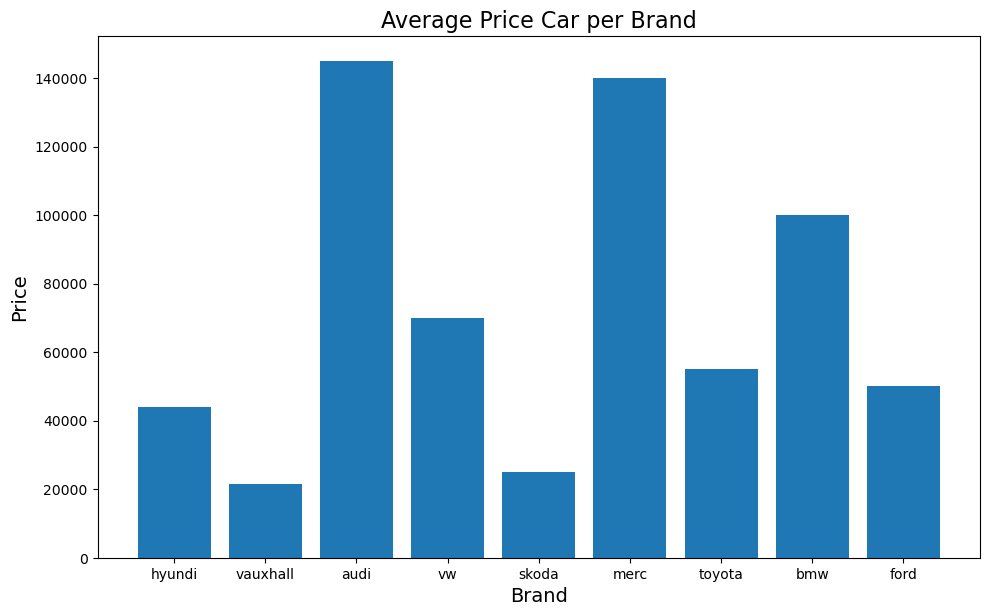

In [91]:
plt.figure(figsize=(10,6)) 
plt.bar(data = bra_pri, x = car['brand'], height = car['price'])
plt.xlabel('Brand',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.savefig("Average Price Car per Brand.png")
plt.tight_layout()
plt.title('Average Price Car per Brand', fontsize=16)
plt.show()

In [92]:
mod_pri = car.groupby('model')['price'].mean().reset_index() 
mod_pri.head()

,model,price
0,6 Series,23852.428571
1,7 Series,35829.041667
2,8 Series,63266.259259
3,A7,28311.230769
4,A8,34083.119048


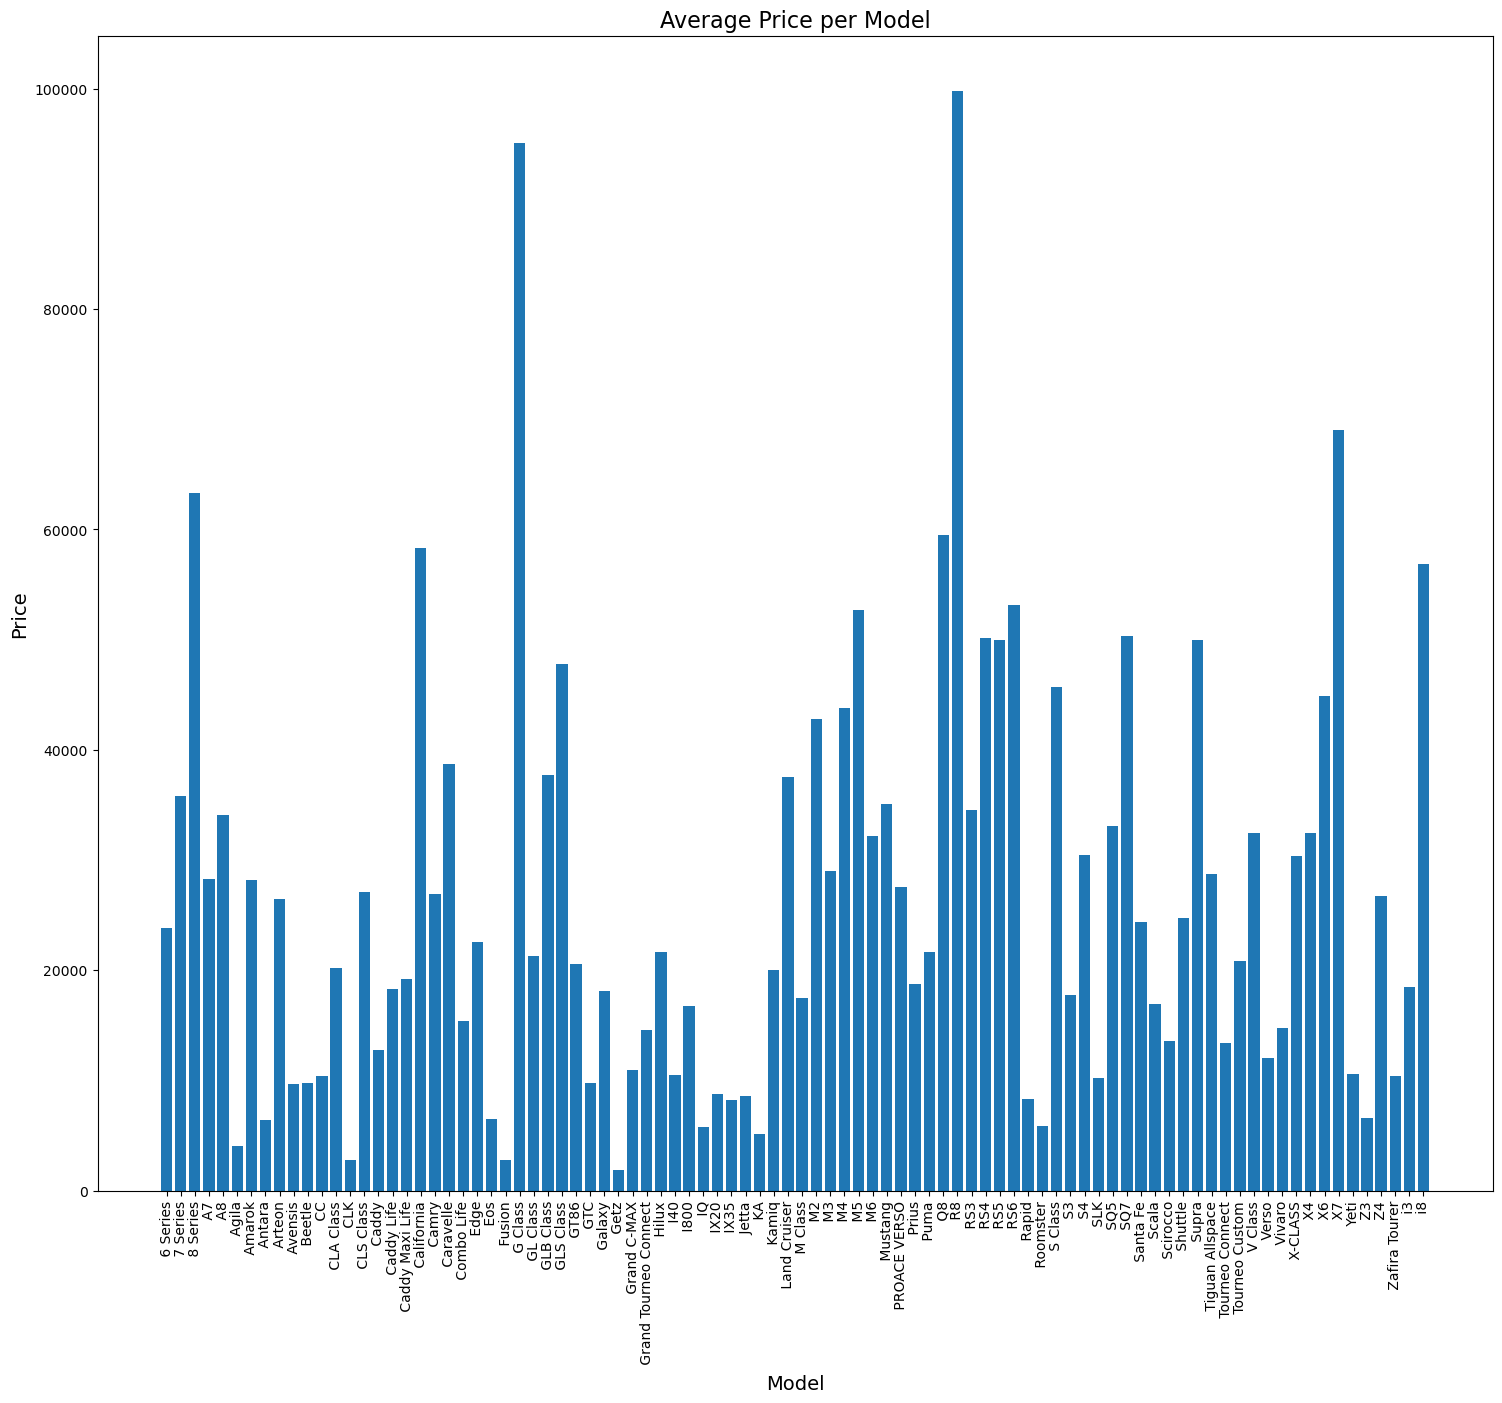

In [93]:
plt.figure(figsize=(18,15))
plt.xticks(rotation = 90)
plt.bar(data = mod_pri, x = 'model', height = 'price') 
plt.xlabel('Model',fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Average Price per Model', fontsize=16)
plt.savefig("Average Price per Model.png")
plt.tight_layout
plt.show()

In [95]:
fuel_mpg = car.groupby('fuelType')['mpg'].mean().sort_values(ascending = True).reset_index()
fuel_mpg

,fuelType,mpg
0,Petrol,42.519217
1,Diesel,48.355752
2,Hybrid,134.706952
3,Other,177.123077
4,Electric,470.800000


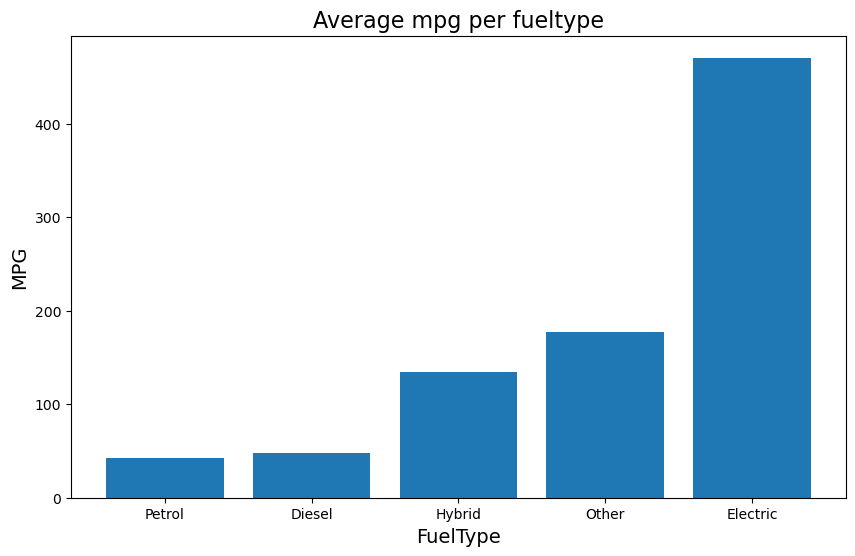

In [96]:
plt.figure(figsize=(10,6)) 
plt.tight_layout
plt.xlabel('FuelType',fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.title('Average mpg per fueltype', fontsize=16)
plt.savefig("Average mpg per fueltype.png")
plt.bar(data = fuel_mpg, x = 'fuelType', height = 'mpg') 
plt.show()

In [97]:
tra_pri = car.groupby('transmission')['price'].mean().reset_index()
tra_pri

,transmission,price
0,Automatic,27474.275925
1,Manual,13197.695967
2,Other,15999.000000
3,Semi-Auto,33351.031204


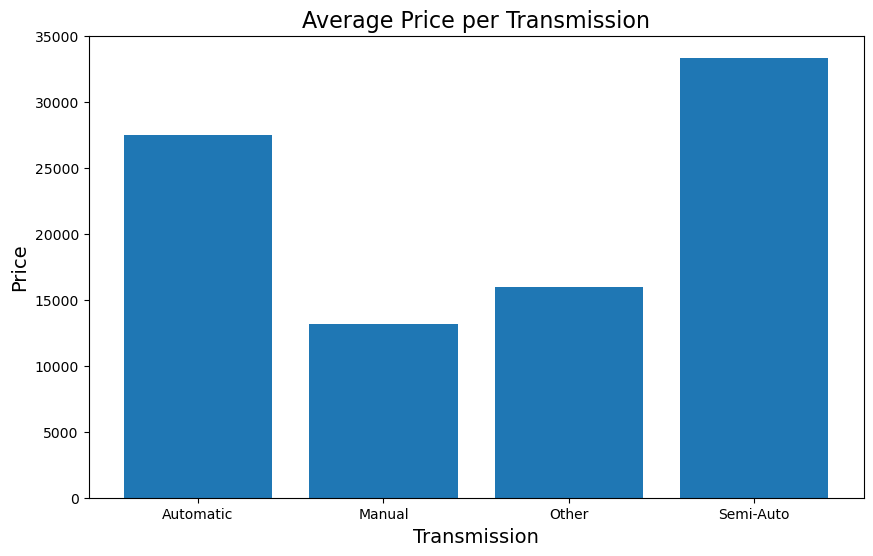

In [98]:
plt.figure(figsize=(10,6))
plt.bar(data = tra_pri, x = 'transmission', height = 'price')
plt.tight_layout
plt.xlabel('Transmission',fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Average Price per Transmission', fontsize=16)
plt.savefig("Average Price per transmission.png")
plt.show()

In [99]:
car.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


In [100]:
mil_ful = car.groupby('fuelType')['mileage'].mean().sort_values(ascending = False).reset_index()
mil_ful

,fuelType,mileage
0,Hybrid,30110.053250
1,Other,29096.115385
2,Diesel,26786.478131
3,Petrol,21437.866258
4,Electric,19727.500000


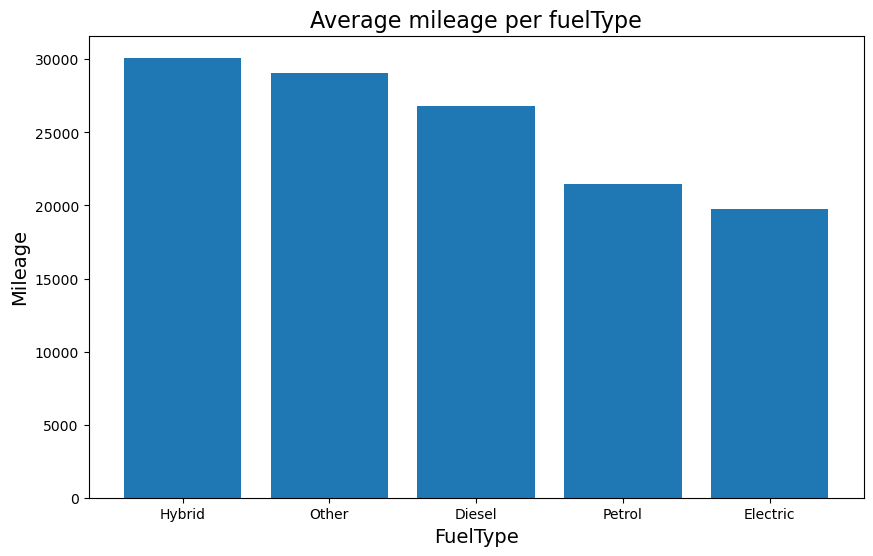

In [101]:
plt.figure(figsize=(10,6))
plt.tight_layout
plt.bar(data = mil_ful, x = 'fuelType', height = 'mileage')
plt.xlabel('FuelType',fontsize=14)
plt.ylabel('Mileage', fontsize=14)
plt.title('Average mileage per fuelType', fontsize=16)
plt.savefig("Average mileage per fueltype.png")
plt.show()

<Axes: >

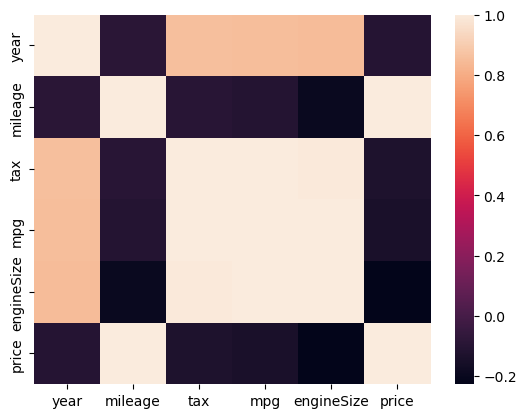

In [102]:
correlation_matrix = car.describe(include = 'number').corr()
sns.heatmap(correlation_matrix)

In [103]:
correlation_matrix

,year,mileage,tax,mpg,engineSize,price
year,1.000000,-0.093279,0.857597,0.854222,0.849497,-0.105268
mileage,-0.093279,1.000000,-0.098061,-0.108086,-0.194602,0.996550
tax,0.857597,-0.098061,1.000000,0.999721,0.994935,-0.130392
mpg,0.854222,-0.108086,0.999721,1.000000,0.996145,-0.141897
engineSize,0.849497,-0.194602,0.994935,0.996145,1.000000,-0.227734
price,-0.105268,0.996550,-0.130392,-0.141897,-0.227734,1.000000


In [104]:
mil_pri = car.groupby('mileage')['price'].mean().reset_index()
mil_pri.head()

,mileage,price
0,1.0,22571.000000
1,3.0,42494.500000
2,4.0,13495.000000
3,5.0,34446.142857
4,6.0,39110.000000


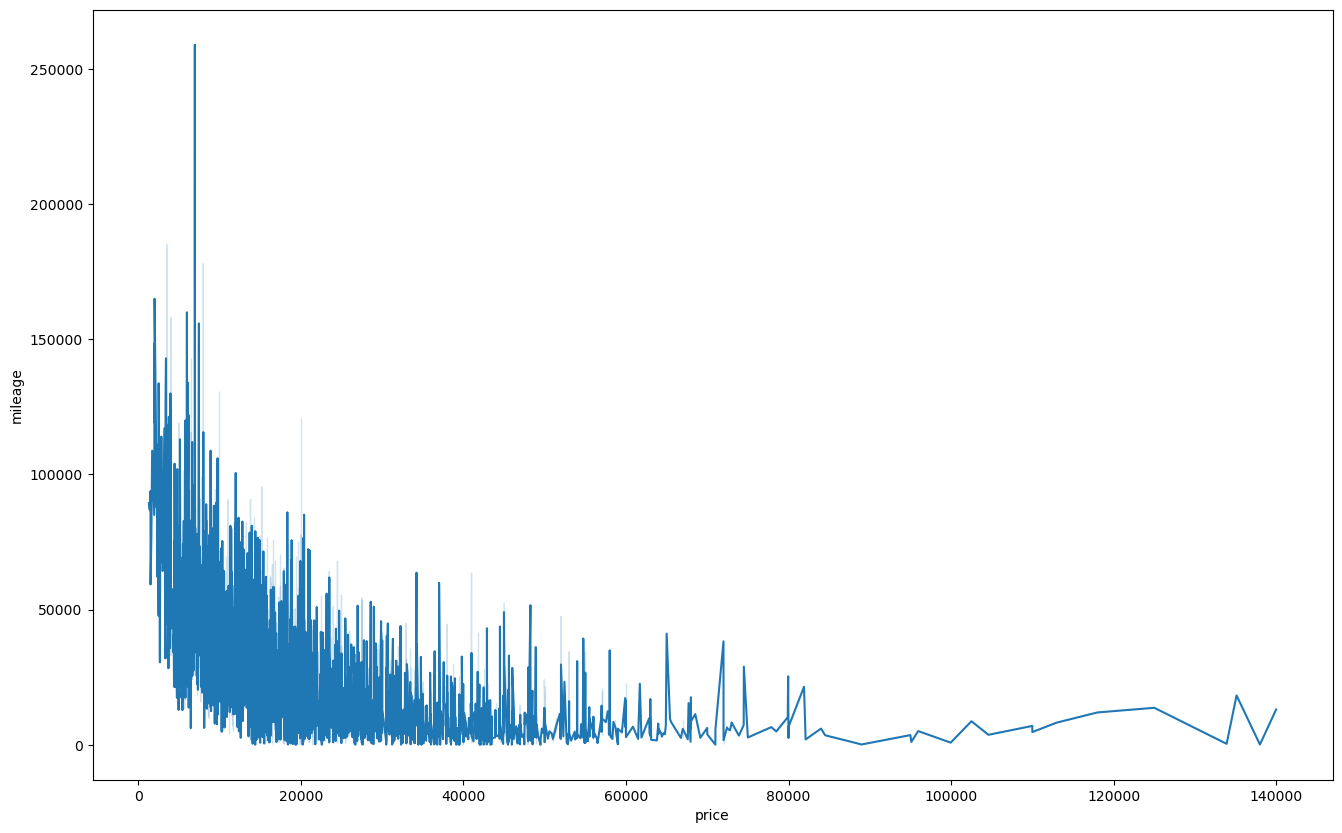

In [105]:
plt.figure(figsize=(16,10))
sns.lineplot(data = mil_pri, y = 'mileage', x = 'price')
plt.show()

In [106]:
tax_mpg = car.groupby('tax')['mpg'].mean().reset_index()
tax_mpg.head()

,tax,mpg
0,0,155.556410
1,10,64.600000
2,20,62.668386
3,30,60.673724
4,115,58.900000


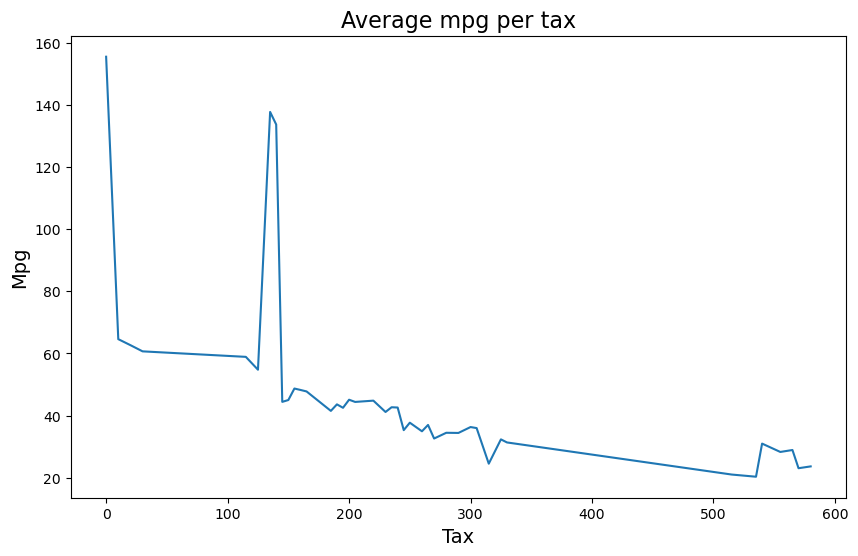

In [107]:
plt.figure(figsize=(10,6))
plt.tight_layout
sns.lineplot(data = tax_mpg, x = 'tax', y = 'mpg') 
plt.xlabel('Tax', fontsize=14)
plt.ylabel('Mpg',fontsize=14)
plt.title('Average mpg per tax',fontsize=16)
plt.show()

In [109]:
eng_mpg = car.groupby('engineSize')['mpg'].mean().reset_index()
eng_mpg.head()

,engineSize,mpg
0,0.0,307.397059
1,0.6,470.800000
2,1.0,53.083270
3,1.1,51.400000
4,1.2,53.360071


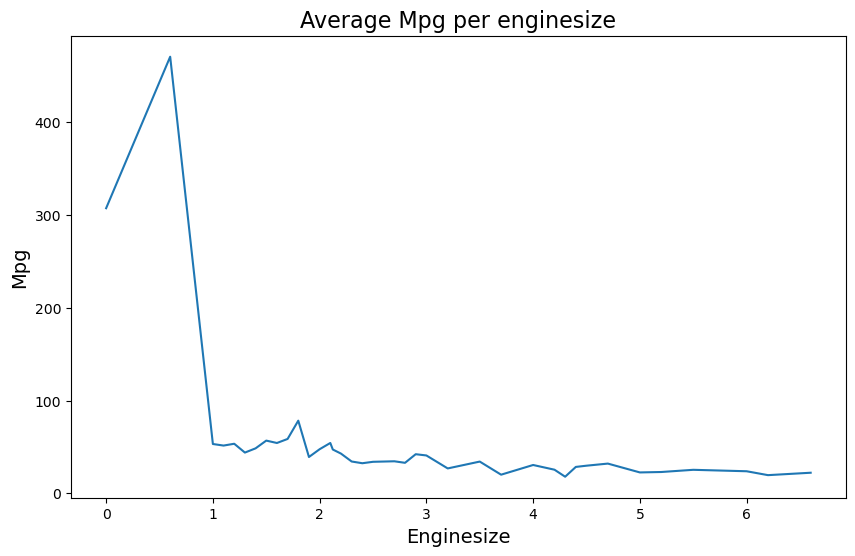

In [110]:
plt.figure(figsize=(10,6))
plt.tight_layout
sns.lineplot(data = eng_mpg, x = 'engineSize', y = 'mpg') 
plt.xlabel('Enginesize', fontsize=14)
plt.ylabel('Mpg', fontsize=14)
plt.title('Average Mpg per enginesize',fontsize=16)
plt.show()

In [111]:
car.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


In [113]:
tax_mpg = car.groupby('tax')['mpg'].mean().reset_index()
tax_mpg.head()

,tax,mpg
0,0,155.556410
1,10,64.600000
2,20,62.668386
3,30,60.673724
4,115,58.900000


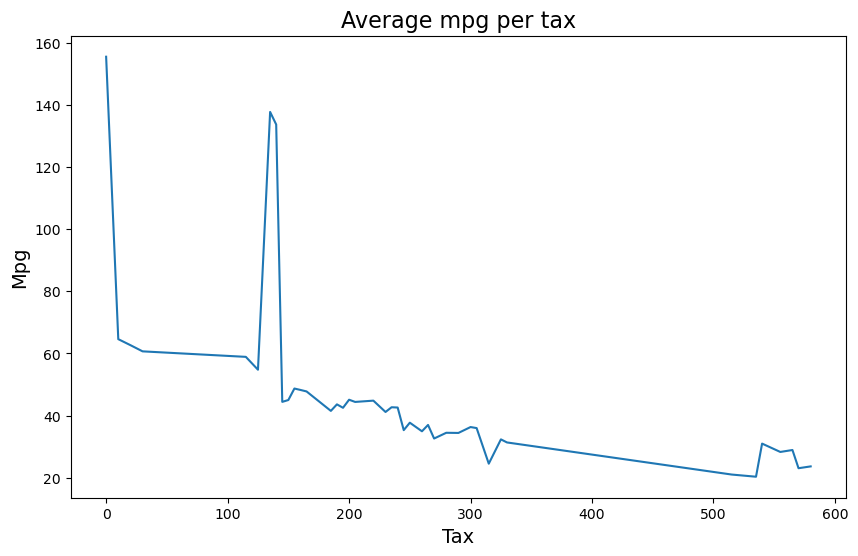

In [114]:
plt.figure(figsize=(10,6))
plt.tight_layout
sns.lineplot(data = tax_mpg, x = 'tax', y = 'mpg') 
plt.xlabel('Tax',fontsize=14)
plt.ylabel('Mpg',fontsize=14)
plt.title('Average mpg per tax',fontsize=16)
plt.show()

In [116]:
tax_year = car.groupby('year')['tax'].mean().reset_index()
tax_year.head()

,year,tax
0,1997,267.500000
1,1998,265.000000
2,1999,220.000000
3,2000,267.500000
4,2001,352.777778


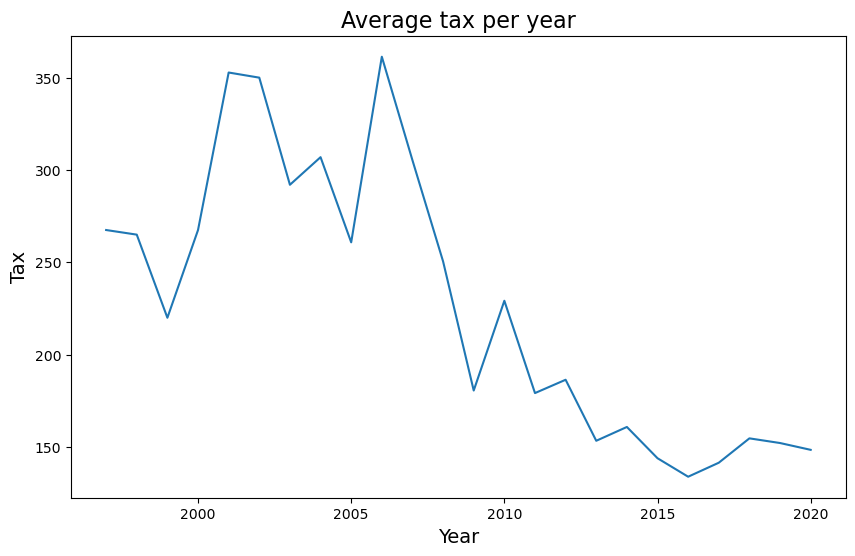

In [117]:
plt.figure(figsize=(10,6))
plt.tight_layout
sns.lineplot(data = tax_year, y = 'tax', x = 'year') 
plt.xlabel('Year',fontsize=14)
plt.ylabel('Tax',fontsize=14)
plt.title('Average tax per year',fontsize=16)
plt.show()

In [119]:
year_price = car.groupby('year')['price'].mean().reset_index()
year_price.head()

,year,price
0,1997,4300.000000
1,1998,10990.000000
2,1999,4646.666667
3,2000,2740.000000
4,2001,4004.444444


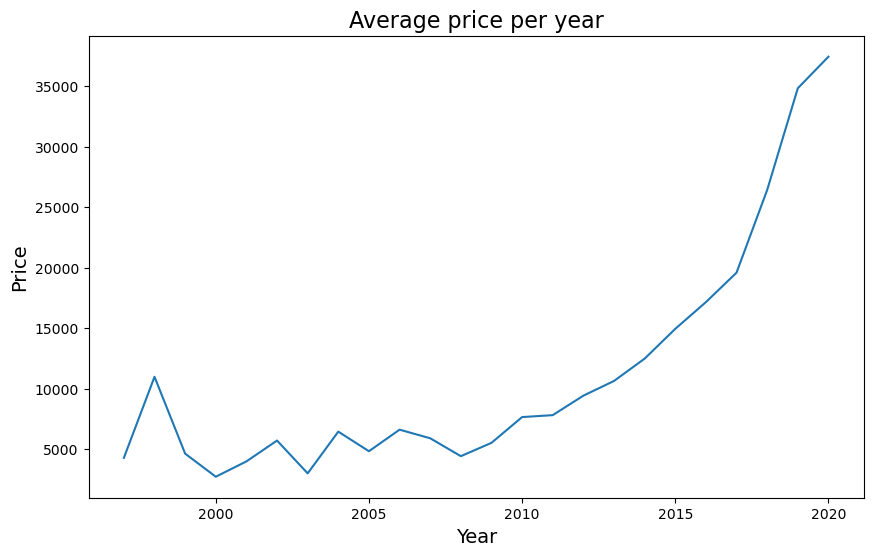

In [120]:
plt.figure(figsize=(10,6))
plt.tight_layout
sns.lineplot(data = year_price, x = 'year', y = 'price') 
plt.xlabel('Year',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.title('Average price per year',fontsize=16)
plt.show()

In [122]:
bra_mil = car.groupby('brand')['mileage'].mean().reset_index()
bra_mil

,brand,mileage
0,audi,23055.862573
1,bmw,19586.309524
2,ford,26251.129751
3,hyundi,29392.698603
4,merc,27990.272735
5,skoda,17858.334838
6,toyota,30647.161340
7,vauxhall,23087.783088
8,vw,24594.691490


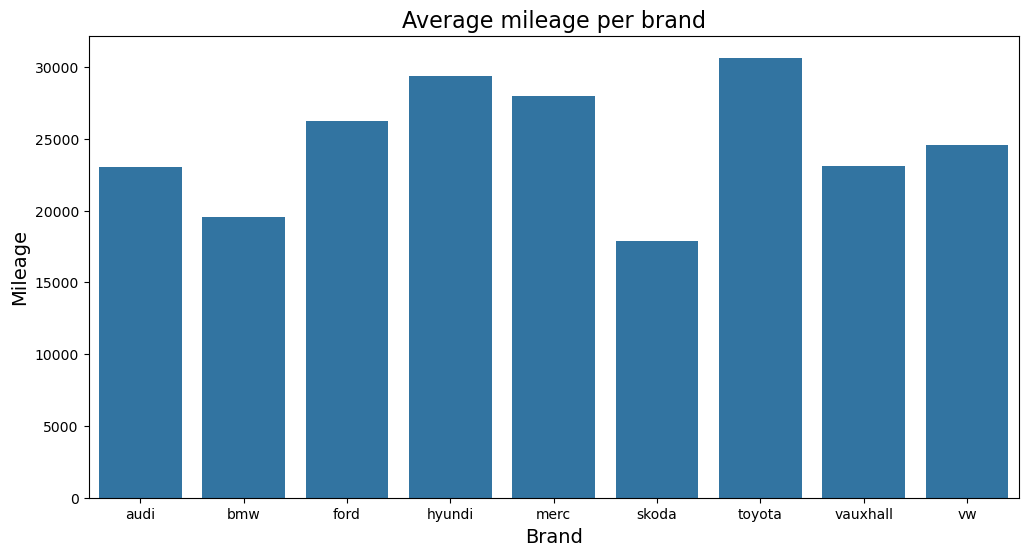

In [123]:
plt.figure(figsize=(12,6))
sns.barplot(data = bra_mil, x = 'brand', y = 'mileage')
plt.xlabel('Brand',fontsize=14)
plt.ylabel('Mileage', fontsize=14)
plt.title('Average mileage per brand', fontsize=16)
plt.savefig("Average mileage per brand.png")
plt.show()

In [125]:
mil_enge = car.groupby('engineSize')['mileage'].mean().sort_values(ascending= False).reset_index()
mil_enge.head()

,engineSize,mileage
0,4.3,185000.0
1,3.7,165000.0
2,2.7,117000.0
3,3.2,77916.0
4,1.9,74570.5


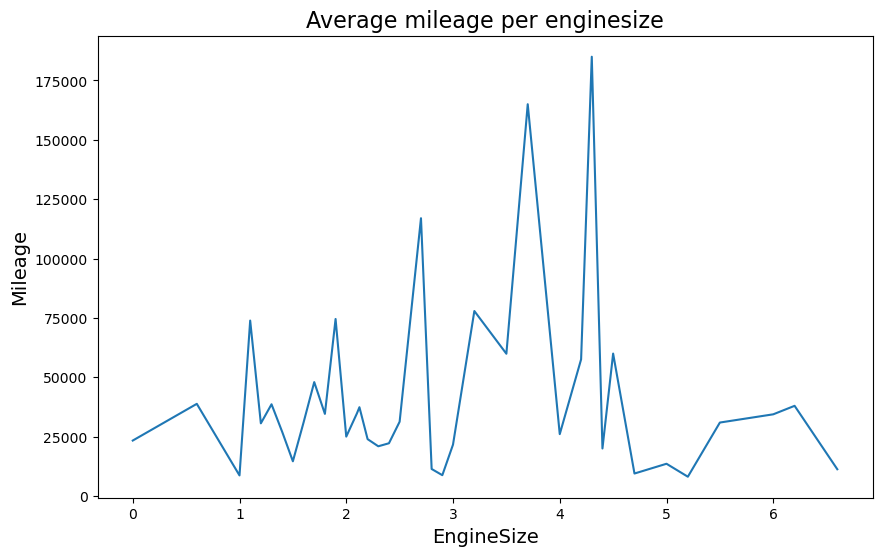

In [126]:
plt.figure(figsize = (10,6))
sns.lineplot(data = mil_enge, x = 'engineSize', y = 'mileage')
plt.xlabel('EngineSize',fontsize=14)
plt.ylabel('Mileage', fontsize=14)
plt.title('Average mileage per enginesize', fontsize=16)
plt.savefig("Average mileage per enginesize.png")
plt.show()

In [128]:
car.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


# Data Encoding

In [130]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
car["transmission"] = encoder.fit_transform(car["transmission"])
car["fuelType"] = encoder.fit_transform(car["fuelType"])
car["model"] = encoder.fit_transform(car["model"])
car["brand"] = encoder.fit_transform(car["brand"])

In [131]:
car.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,3,69,2019,3,4223.0,0,145,39.8,2.2,31995
1,7,30,2015,1,47870.0,0,125,60.1,2.0,7700
2,0,58,2019,0,5151.0,4,145,29.1,2.9,58990
3,8,71,2016,0,20423.0,0,30,57.6,2.0,12999
4,5,70,2020,3,3569.0,4,145,47.1,1.0,16990


# Scalling

In [133]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
car['model'] = scaler.fit_transform(car[['model']])
car['tax'] = scaler.fit_transform(car[['tax']])
car['mileage'] = scaler.fit_transform(car[['mileage']])
car['mpg'] = scaler.fit_transform(car[['mpg']])


In [134]:
car.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,3,0.966054,2019,3,-0.851558,0,-0.086420,-0.296600,2.2,31995
1,7,-0.523407,2015,1,0.933943,0,-0.329358,0.269942,2.0,7700
2,0,0.545950,2019,0,-0.813596,4,-0.086420,-0.595220,2.9,58990
3,8,1.042437,2016,0,-0.188852,0,-1.483314,0.200171,2.0,12999
4,5,1.004245,2020,3,-0.878312,4,-0.086420,-0.092868,1.0,16990


# Feuture Selection

In [135]:
x = car.drop('price', axis = 1)

In [136]:
x.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,3,0.966054,2019,3,-0.851558,0,-0.086420,-0.296600,2.2
1,7,-0.523407,2015,1,0.933943,0,-0.329358,0.269942,2.0
2,0,0.545950,2019,0,-0.813596,4,-0.086420,-0.595220,2.9
3,8,1.042437,2016,0,-0.188852,0,-1.483314,0.200171,2.0
4,5,1.004245,2020,3,-0.878312,4,-0.086420,-0.092868,1.0


In [137]:
y = car['price']

In [138]:
y.head()

0    31995
1     7700
2    58990
3    12999
4    16990
Name: price, dtype: int64

In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  # For regression tasks
selector = SelectKBest(score_func=f_regression, k=9)
x_new = selector.fit_transform(x, y)


In [199]:
indices = selector.get_support(indices = True)
print(x.iloc[:,indices])

      brand     model  year  transmission   mileage  fuelType       tax  \
0         3  0.966054  2019             3 -0.851558         0 -0.086420   
1         7 -0.523407  2015             1  0.933943         0 -0.329358   
2         0  0.545950  2019             0 -0.813596         4 -0.086420   
3         8  1.042437  2016             0 -0.188852         0 -1.483314   
4         5  1.004245  2020             3 -0.878312         4 -0.086420   
...     ...       ...   ...           ...       ...       ...       ...   
4955      4 -0.676172  2015             0 -0.029680         0 -0.329358   
4956      1 -1.669146  2017             0 -0.287972         0 -0.086420   
4957      8 -1.249042  2015             1  2.450066         0 -1.483314   
4958      0 -1.554572  2017             3  0.209057         0 -0.086420   
4959      4  0.851480  2014             0  0.621408         0 -0.025686   

           mpg  engineSize  
0    -0.296600         2.2  
1     0.269942         2.0  
2    -0.5952

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.20, random_state=42)

# Regression Model

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [204]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.02332657200811359


In [205]:
from sklearn.metrics import mean_absolute_error
pred = model.predict(x_test)


In [206]:
mae = mean_absolute_error(pred,y_test)
mae

2315.759634888438

In [207]:
from sklearn.metrics import r2_score
score = r2_score(y_test,pred)
score

0.928287853271652